In [2]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import ode
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

In [3]:
a=5
b= 500
xx = np.linspace(-a, a, b)
yy = np.linspace(-a, a, b)
mX, mY = np.meshgrid(xx,yy)

In [4]:
r1=np.array([1.3/np.sqrt(3),1])   # f is direction of the force
f=np.array([0,1])                         # r is position of the force red arrow - touchdown point
r2=np.array([-1.3/np.sqrt(3),1])
r3=np.array([0,0])

def stokeslet(f,r0,mX,mY):
    Id=np.array([[1,0],[0,1]])
    r=np.array([mX-r0[0],mY-r0[1]])

    Idf=np.dot(Id,f) 
    
    rTf=(r*f[:,np.newaxis,np.newaxis]).sum(axis=0)
    rrTf=(r*rTf[np.newaxis,])
    modr=(r[0]**2+r[1]**2)**.5
    
    u,v=Idf[:,np.newaxis,np.newaxis]/modr[np.newaxis]+rrTf/modr**3.
    return [u,v]

u1,v1=stokeslet((-.5)*f,r1,mX,mY)
u2,v2=stokeslet((-.5)*f,r2,mX,mY)
u3,v3=stokeslet(f,r3,mX,mY)
u=u1+u2+u3
v=v1+v2+v3

def B_dir(t,p,fx,fz):
    ex = fx(p[0],p[1])
    ez = fz(p[0],p[1])
    n = (ex**2.0+ez**2.0)**0.5
    return [ex/n, ez/n]


In [5]:
# set the starting point of the magnetic field line
xstart = np.linspace(-0.99*a, 0.99*a, 14)
additional = np.linspace(-0.99*a, 0.99*a, 8)
ystart = np.zeros(22)
for i in additional:
    xstart = np.append(xstart, -i)

for i in range(0, 22):
    if i<14:
        ystart[i]=0.99*a
    if i>=14:
        ystart[i]=-0.99*a


places=np.vstack([xstart,ystart]).T
# interpolate function of the Bx and Bz as functions of (x,z) position
fbx = interpolate.interp2d(xx,yy,u)
fbz = interpolate.interp2d(xx,yy,v)




print(ystart)


[ 4.95  4.95  4.95  4.95  4.95  4.95  4.95  4.95  4.95  4.95  4.95  4.95
  4.95  4.95 -4.95 -4.95 -4.95 -4.95 -4.95 -4.95 -4.95 -4.95]


In [6]:
R=0.001
dt=0.8*R

# plot area
x0, x1= -0.99*a, 0.99*a
y0, y1= -0.99*a, 0.99*a

#set the ode function
r=ode(B_dir)
r.set_integrator('vode')
r.set_f_params(fbx,fbz)

xs,ys = [],[]
for p in places:
    x=[p[0]] 
    y=[p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(r.y[1])
        hit_electrode=False
        #check if field line left drwaing area
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    xs.append(x)
    ys.append(y)
    


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


[3580, 6452, 8578, 9908, 10837, 12167, 12168, 13150, 13373, 13440, 13441, 14185, 18391]


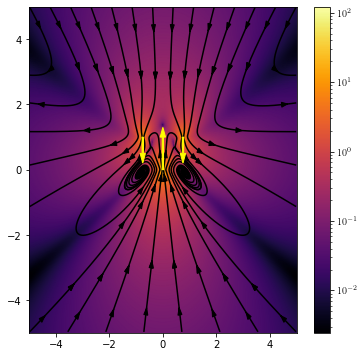

In [7]:
fig=plt.figure(figsize=(6,6),facecolor="w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True


p, result = [], []
for x in xs:
    p.append(len(x))

[result.append(x) for x in p if x not in result]

result.sort()
k = result[-1]
print(result)
h = int(k/200)
l, m, k, f = result[0], result[1], result[-1], result[-2]
p = int(m/200)
g = int(f/200)
for x,y in zip(xs,ys):
    ax.plot(x,y, color="k" , zorder=10)
    
    #ax.arrow(x[60*h], y[3*h], x[3*h-1]-x[3*h-2], y[3*h+2]-y[3*h+1], length_includes_head=True, head_width=.15, color="k", zorder=5)
    ax.arrow(x[10*h], y[10*h], x[10*h-1]-x[10*h-2], y[10*h+5]-y[10*h+4], length_includes_head=True, head_width=.15, color="k", zorder=5)
    ax.arrow(x[30*h], y[30*h], x[30*h-1]-x[30*h-2], y[30*h+5]-y[30*h+4], length_includes_head=True, head_width=.15, color="k", zorder=5)
    if len(x) == f:
        ax.arrow(x[100*g], y[100*g], (x[100*g-1]-x[100*g-2]), (y[100*g+5]-y[100*g+4]), length_includes_head=True, head_width=.15, color="k", zorder=5)
    if len(x)== k:
        ax.arrow(x[150*h], y[150*h], (x[150*h-1]-x[150*h-2]), (y[150*h+5]-y[150*h+4]), length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[70*h], y[70*h], (x[70*h-1]-x[70*h-2]), (y[70*h+5]-y[70*h+4]), length_includes_head=True, head_width=.15, color="k", zorder=5)
    if len(x)<= k and len(x)>=m:
        ax.arrow(x[30*h], y[30*h], (x[30*h-1]-x[30*h-2]), (y[30*h+5]-y[30*h+4]), length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[190*p], y[190*p], (x[190*p-1]-x[190*p-2]), (y[190*p+5]-y[190*p+4]), length_includes_head=True, head_width=.15, color="k", zorder=5)

Z = np.sqrt(v**2+u**2)
plt.pcolormesh(mX, mY, Z,
                  norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
               snap=True,
                   cmap=plt.cm.inferno, rasterized=True, 
              shading='gouraud')
plt.colorbar()


ax.arrow(x=0, y=0, dx=0, dy=1, head_width = 0.2,
          width = 0.05,
          color ='yellow', zorder=10) 
ax.arrow(x=1.3/np.sqrt(3), y=1, dx=0, dy=-.5, head_width = 0.2,
          width = 0.05,
          color ='yellow', zorder=10) 
ax.arrow(x=-1.3/np.sqrt(3), y=1, dx=0, dy=-.5, head_width = 0.2,
          width = 0.05,
          color ='yellow', zorder=10) 



#ax.set_title(r'$\displaystyle\\v(r)='
 #            r'\frac{\textbf{F}}{8 \pi \mu \eta r } ( \mathds{1} + \frac{\textbf{rr}}{r^2}) + \frac{\textbf{F}}{8 \pi \mu \eta r } ( \mathds{1} + \frac{\textbf{rr}}{r^2})$', fontsize=16, color='k')

#use dpi=4000 to make everything 'in shape'... but it lasts ages


#plt.streamplot(mX,mY,u,v, density=0.5, broken_streamlines=False)
plt.savefig('afraid.png', bbox_inches='tight', pad_inches=0, dpi=400)